<a href="https://colab.research.google.com/github/88270gagan/AirBnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIRBNB BOOKINGS ANALYSIS**


# **PROJECT TYPE: EDA CAPSTONE PROJECT**


# CONTRIBUTION: TEAM
# **Team: data warehouse**
##### **Team Member 1 - Vedant Tule**
##### **Team Member 2 - Sahil Diwan**
##### **Team Member 3 - Lovpreet Singh**
##### **Team Member 4 - Mariyam Mujawar**
##### **Team Member 5 - Simran Singh**

# **Project Summary -**

Airbnb, a renting company operates an online marketplace focused on short-term homestays and experiences. The company acts as a broker and charges a commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

The Airbnb dataset provides us with a great source to better understand New Yorks bustling rental landscape. With around 49k listings registered in the last 9 years, New York has proven to be one of Airbnbs fastest growing cities.

We used google collab to explore the Airbnb data and brainstrom the various insights. We imported several libraries and load the airbnb data csv file from the google drive. After that we clean the data using methods of Pandas DataFrame. We removed unnecessary data from the datset like Id, name and last reviews as they do not support the data required. We filled the null values with zero constant and did the visualization using seaborn, pyplot, matplotlib,etc. We created some plots to show the data and extract insights through histogram, boxplot, bar graph, etc. We also created some of our own manipulations in the data and created our own columns which gives us a good visualisation of the data. 

Dataset Description:

1. id: Unique ID
2. name: name of the listing
3. host_id: Unique host ID
4. host_name: name of the host
5. neighbourhood_group: location
6. neighbourhood: area
7. latitude: latitude range
8. longitude: longitude range
9. room_type: type of listing
10. price: price of listing
11. minimum_nights: minimum nights to be paid for
12. number_of_reviews: number of reviews
13. last_review: content of the last review
14. reviews_per_month: number of reviews per month
15. calculated_host_listings_count: total count
16. availability_365: number of days when listing is available for booking


From the basic overview of the data we can say that downtown Manhattan and the adjacent parts of Brooklyn had by far the highest concentration of listings. Staten Island and Bronx have been slow adopters. This animation we developed does a good job of visualizing Airbnbs host network growth. Most Airbnb houses are in either Manhattan or Brooklyn. However, these two regions are also the highest prices among the five regions. A possible reason is that because the demands in these regions are high, causing more hosts to rent out their rooms or apartments.

All of us had a deep sense of team work and communicated well with each other. We were successful in acknowledging and appreciating each others eﬀorts while at the same time corrected each other along the way. As a team, we invested a lot of time in discussing and brainstorming ideas from selecting the dataset to compiling the final version of this colab notebook.

# **GitHub Link -**

# **Problem Statement**


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.


#### **Define Your Business Objective?**

Airbnb's mission is to help create a world where you can belong anywhere and where people can live in a place, instead of just traveling to it. As we work to achieve this goal, we are focused on building for the future, driving strong sustained growth, and creating new businesses that will power long-term success.

Airbnb listings are available in about 321 areas over a 5 different locations and in 3 different room type, airbnb is focussed to optimize the platform and to support the expansion and development of new business units.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt

### Dataset Loading

In [ ]:
# Load Dataset
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Dataset First View

In [ ]:
# Dataset First Look
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(df.duplicated().value_counts())

False    48895
dtype: int64


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

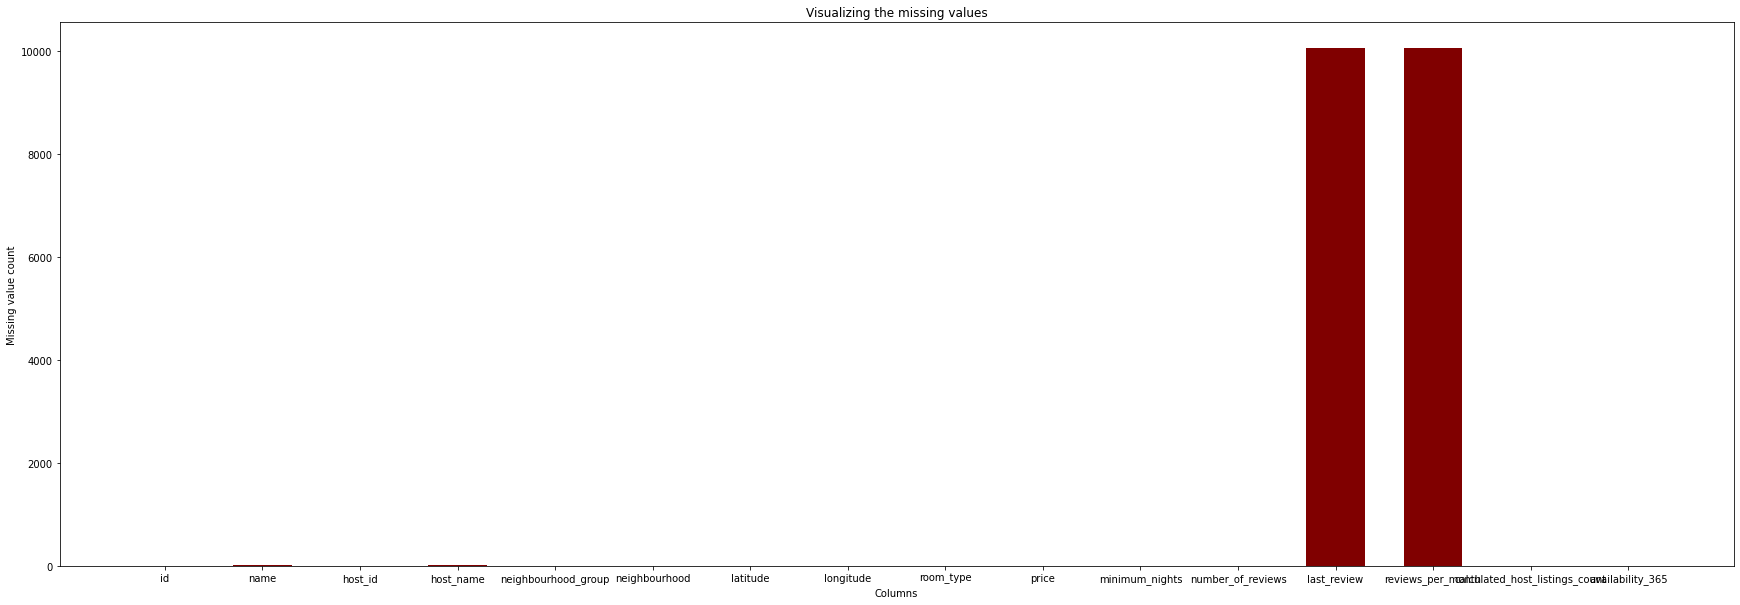

In [ ]:
# Visualizing the missing values
courses = list(df.columns)
values = list(df.isnull().sum())
fig = plt.figure(figsize = (30, 10))
plt.bar(courses, values, color ='maroon',
        width = 0.6)
plt.xlabel("Columns")
plt.ylabel("Missing value count")
plt.title("Visualizing the missing values")
plt.show()

### What did you know about your dataset?

From the above Bar Plot we are anlysing the missing values of entire row and columns in the Bar Plot. Hence, we are getting that Last reviews per month have the most missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
(df.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

Variable Description:

1. id: Unique ID
2. name: name of the listing
3. host_id: Unique host ID
4. host_name: name of the host
5. neighbourhood_group: location
6. neighbourhood: area
7. latitude: latitude range
8. longitude: longitude range
9. room_type: type of listing
10. price: price of listing
11. minimum_nights: minimum nights to be paid for
12. number_of_reviews: number of reviews
13. last_review: content of the last review
14. reviews_per_month: number of reviews per month
15. calculated_host_listings_count: total count
16. availability_365: number of days when listing is available for booking

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df['neighbourhood_group'].unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df['host_name'].unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Removing unnecessary columns
df.drop(['id','name','last_review'],axis=1,inplace=True)

In [ ]:
# Replace the NaN Values of 'reviews per month' by zero
df.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
df.fillna({'host_name':'none'},inplace=True)

In [ ]:
# Removing duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df.shape

(48895, 13)

In [ ]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### What all manipulations have you done and insights you found?

In this, first we drop unnecessary columns since there are many columns with Null values. We removed columns such as id, name & last_review.

Then, replacing all NaN values in “review_per_month” with 0.

Now we have the data with no 'NaN values' and we are ready to explore,vizualise and experiment the data with via charts. 


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Which neighbourhood group has the highest number of listings ? 

In [ ]:
# Chart - 1 visualization code
## Calculating value counts for each neighbourhood_group
Locations = df['neighbourhood_group'].value_counts()
Locations

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

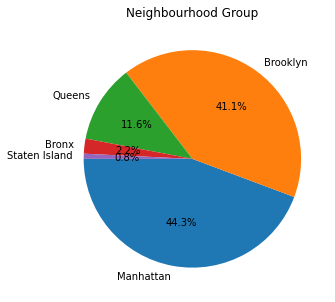

In [ ]:
## Pie Chart showing Neighbourhood Group Listings percentage 
plt.figure(figsize=(10,5))
plt.title("Neighbourhood Group")
g = plt.pie(Locations, labels=Locations.index, autopct='%1.1f%%', startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

We used Pie Chart in the above representation beacause it makes the data more presentable and easy to understand. By looking at the chart itself one can draw certain inferences or analysis. It helps in summarizing a very large data in a very crisp and easy manner. As we can see that we got exact analysis(in percentage) of various neighbourhood group and now we can summarise the data very easily. 

##### 2. What is/are the insight(s) found from the chart?


1. Manhattan with 44.3% has the highest number of listings followed by Brooklyn with 41.1% and followed by Queens with 11.6%.

2. Staten Island(0.8%) has the least numder of listings in the entire New York and Bronx(2.2%) has the second lowest listings count.

3. Manhattan and Brooklyn are preferred location for the tourists in the entire city.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.

Staten Island and Bronx has low listings so it may may have negetive impact on business.

#### Chart - 2: Show the trend of 'room type' for different 'neighbourhood group'

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


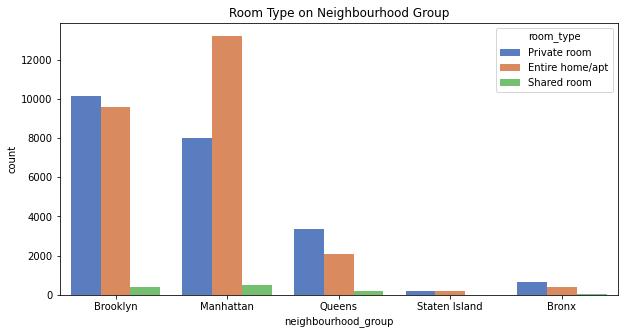

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

##### 1. Why did you pick the specific chart?

Countplot chart is used to Show the counts of observations in each categorical bin using bars. The above chart gives us the analysis of neighbourhood group for each room type.

##### 2. What is/are the insight(s) found from the chart?

1. In Brooklyn location, Private room type is preferred more as compared other room type.

2. In Manhattan location, Entire home/apt is preferred more as compared other room type.

3. In Oueens location, Private room type is preferred more as compared other room type.

4. In Staten Island location, private room and entire home/apt have same share of listings.

5. In Bronx location, Private room type is preferred more as compared other room type.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.

Shared room very less preferred listings room type so it may may have negetive impact on business.

#### Chart - 3: Which room type have been more used by travellers?

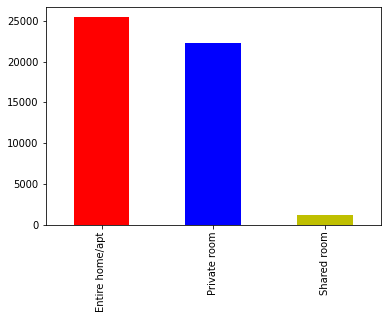

In [ ]:
# Chart - 3 visualization code
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()

##### 1. Why did you pick the specific chart?

We used bar chart because bar chart summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. This bar chart description of various room type.

##### 2. What is/are the insight(s) found from the chart?

1. Entire home/apt is the most preferred room type in the entire city.

2. Private room type is second most preferred room type.

3. Shared room type is the least preferred room type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.

Shared room type the least preferred room type among all the room types so it may generate low revenue which may have a negative impact.


#### Chart - 4: Create a new updated price column. Updated price will be calculated as follows - if room type is private room then updated price will get doubled, if room type is Entire home/apt then updated price will be tripled and if the room type is shared room then updated price will be halved

In [ ]:
# Chart - 4 visualization code
def updated_price(room_type, price):
  if room_type == 'Private room':
    updated_price = 2*price
  elif room_type == ' Entire home/apt':
    updated_price = 3*price
  else:
    updated_price = 0.5*price
  return updated_price

In [ ]:
df['updated_price'] = df.apply(lambda x : updated_price(x['room_type'],x['price']),axis=1)
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,updated_price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,298.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,112.5
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,300.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,44.5
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,40.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,100.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,120.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,158.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,158.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,75.0


Text(0.5, 1.0, 'Line chart of price and updated price')

<Figure size 1008x432 with 0 Axes>

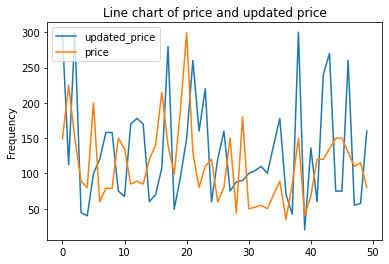

In [ ]:
plt.figure(figsize = (14,6))
df[['updated_price','price']].head(50).plot();
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Line chart of price and updated price")

##### 1. Why did you pick the specific chart?

We use  line chart because it  represents information as a series of data points connected with a straight line. Very often, we use this to find out how a particular feature changes with respect to time and also with respect to one another. 

##### 2. What is/are the insight(s) found from the chart?

In updated price, we doubled the price for price for private room type and tripled the price for Entire home/apt room type. for the shared room type we halved the price and plotted a double line graph to see the variations.

This was an experiment to check wheather we can manipulate prices according to the room types. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.



#### Chart - 5: Which hosts are the busiest and why?

In [ ]:
# Chart - 5 visualization code
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


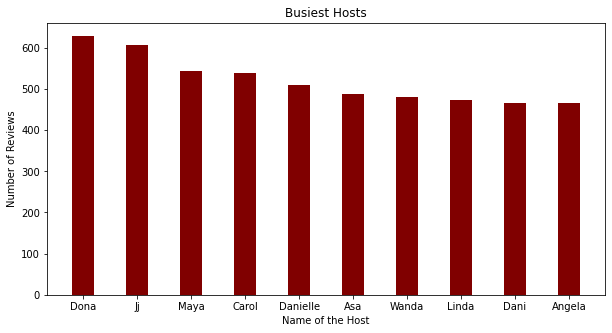

In [ ]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

##### 1. Why did you pick the specific chart?

We used bar chart because bar chart summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table.

##### 2. What is/are the insight(s) found from the chart?

Top 5 Busiest Hosts

1. Dona
2. Jj
3. Maya
4. carol
5. Danielle

Because:This Hosts have room type private and Entire home/apt which is highly preferred.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.

Customers will not prefer the hosts with less number of reviews which may impact the business.

#### Chart - 6: Trend of availability of rooms with respect to neighbourhood group

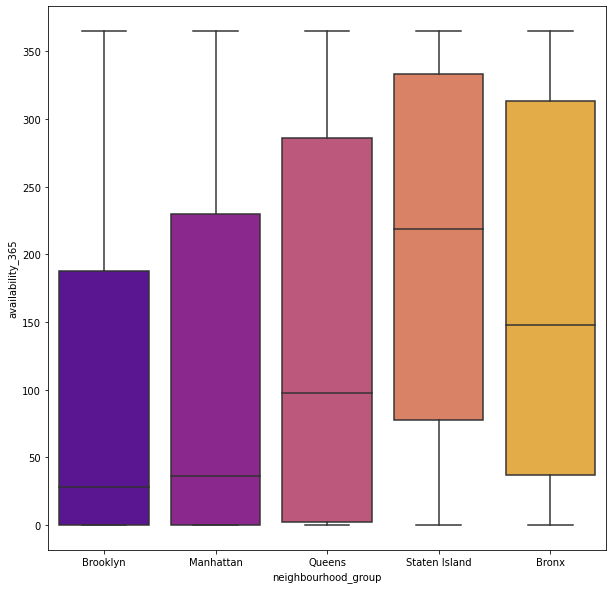

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

##### 1. Why did you pick the specific chart?

We use  box plot to  show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

##### 2. What is/are the insight(s) found from the chart?


Availability corresponds to the number of days in a year that a listing is vacant. It can help us determine which areas are most popular throughout the year.

The average availability by borough shows us that listings in Manhattan and Brooklyn have fewer vacant days compared to the other boroughs. This can be explained by the higher number of tourists that these two areas receive all year round.

So, the  Staten Island has the highest average airbnb availablity.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.

As we Can See that Staten Island has the highest average airbnb availability as followed by Bronx,Queens,Manhattan and Brooklyn So, there will be more Business in these areas in the upcoming days, Hence there will be no any insights that will lead to negative growth.

#### Chart - 7: Maximum number of reviews for listings of each neighbourhood group

In [ ]:
# Chart - 7 visualization code
location_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
location_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


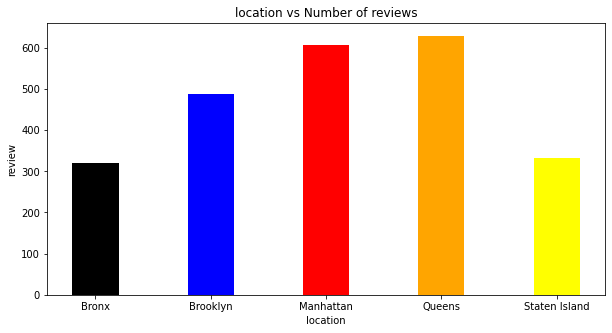

In [ ]:
location = location_reviews['neighbourhood_group']
review = location_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(location, review, color =['black','blue','red','orange','yellow'],
        width = 0.4)
 
plt.xlabel("location")
plt.ylabel("review")
plt.title("location vs Number of reviews")
plt.show()


##### 1. Why did you pick the specific chart?

We used bar chart because bar chart summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table.

##### 2. What is/are the insight(s) found from the chart?

Above Bar Plot shows the different Location and their reviews. Queens have the maximum number of reviews it means it has maximum no of tourist.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.

No it may not have any negative impact on business.

#### Chart - 8: Trend of number of reviews with respect to price of the listings

In [ ]:
# Chart - 8 visualization code
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


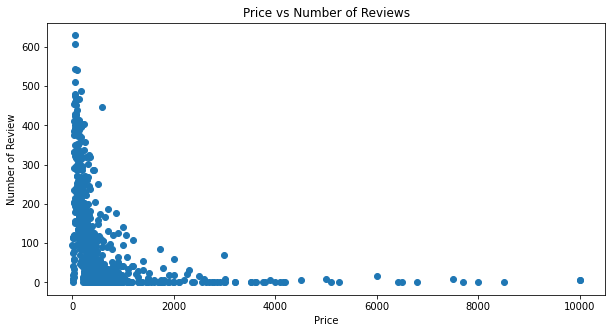

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

##### 1. Why did you pick the specific chart?

We use scatter plot because, scatter plot identifies a possible relationship between changes observed in two different sets of variables. It provides a visual and statistical means to test the strength of a relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

From the above Analysis using scatter plot we can say that most people prefer to stay in place where price is less. (As price increses number of reviews decreases so no of tourist also decreases)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.

Price affect the preferrence of the tourits which have negative on business. 

#### Chart - 9: On the basis of availability of listings around the year give an availability status to each of the listings.

In [ ]:
# Chart - 9 visualization code
def availability_status(availability_365):
    if availability_365 == 0:
      availability_status = 'not available'
    elif availability_365 > 0 and availability_365 <= 150:
      availability_status = 'rarely available'
    elif availability_365 > 150 and availability_365 < 365:
      availability_status = 'mostly available'
    else:
      availability_status = 'always available'
    return availability_status


In [ ]:
df['availability_status'] = df.apply(lambda x : availability_status(x['availability_365']),axis=1)
df.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,availability_status
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,always available
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,mostly available
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,always available
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,mostly available
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,not available
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,rarely available
6,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,not available
7,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,mostly available
8,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0,not available
9,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188,mostly available


In [ ]:
status = df['availability_status'].value_counts()
status

not available       17533
mostly available    15518
rarely available    14549
always available     1295
Name: availability_status, dtype: int64

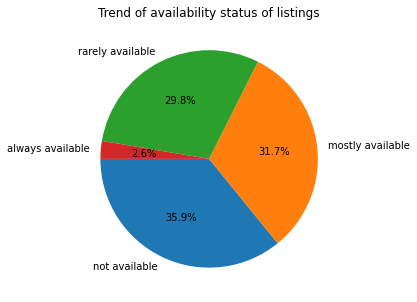

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Trend of availability status of listings")
g = plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

We used Pie Chart in the above representation beacause it makes the data more presentable and easy to understand. By looking at the chart itself one can draw certain inferences or analysis. It helps in summarizing a very large data in a very crisp and easy manner.

##### 2. What is/are the insight(s) found from the chart?

1. We can see from the above pie chart that 17533 listings i.e. 35.9% of listings are not available.
2. 2.6% of the listings are available throught the year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.


#### Chart - 10: What type of room is mostly and leastly available the across the year?

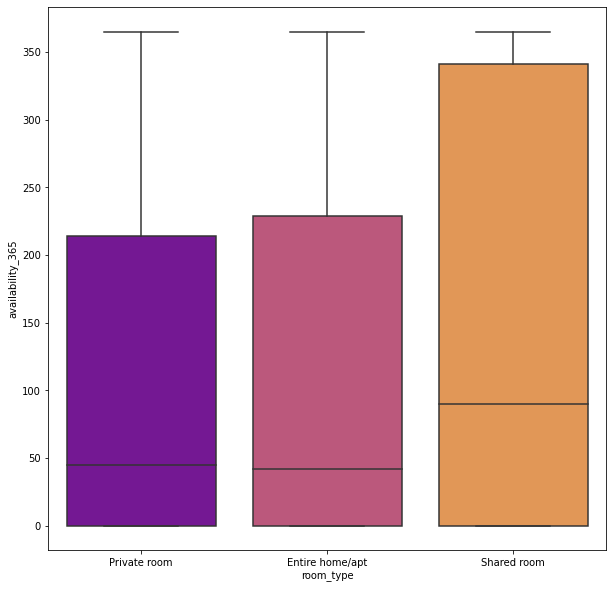

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, y='availability_365',x='room_type',palette='plasma')

##### 1. Why did you pick the specific chart?

The sns.boxplot function is the Seaborn function we use for creating boxplots. There are a variety of parameters that we can use to modify the function, but in the simplest case, the syntax looks something like this: Assuming that you’ve imported Seaborn with the alias sns, you will call the function as sns.boxplot ().

##### 2. What is/are the insight(s) found from the chart?

From the above Box plot we observe that share room type is mostly available as followed by Entire home/apt and least followed is Private room 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
df['price'].groupby(df["room_type"]).describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
Private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
Shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


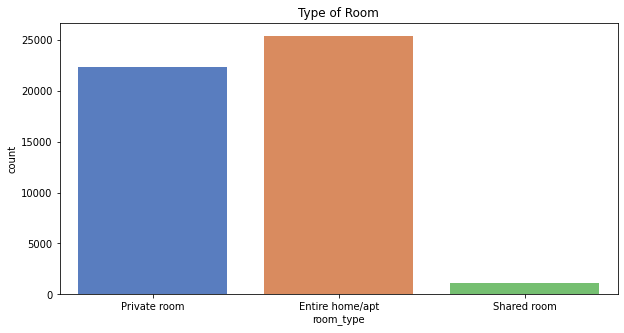

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

##### 1. Why did you pick the specific chart?

 the Seaborn Countplot function creates bar charts of the number of observations per category. When we use sns.countplot, Seaborn literally counts the number of observations per category for a categorical variable, and displays the results as a bar chart

2.What is/are the insight(s) found from the chart?

From the above data we are observing that Entire home/apt is more expensive room type with US$ 211.29

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.
Shared room type may show the negative impact.

#### Chart - 12: Plotting neighbourhood group map with their respective coordinates.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


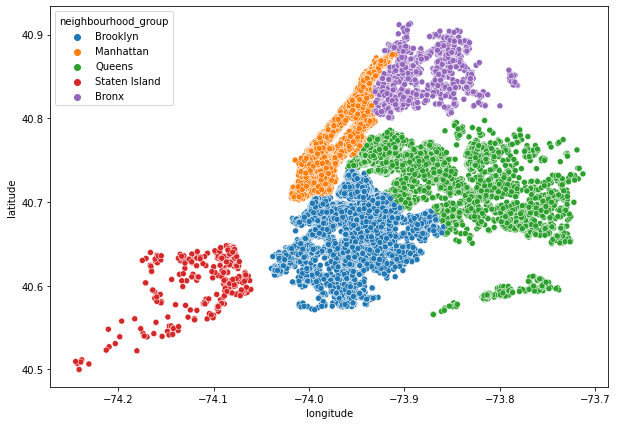

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10,7))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

##### 1. Why did you pick the specific chart?

Specifically, we specified a sns.scatterplot as the type of plot we'd like, as well as the x and y variables we want to plot in these scatter plots. This results in 10 different scatter plots, each with the related x and y data, separated by region. We've also added a legend in the end, to help identify the colors.

##### 2. What is/are the insight(s) found from the chart?

From the above data we found the relationship of neighourhood group with respect to latitude and longitude.

Different colors representing different locations.

We can observe that, Manhattan has the highest number of listings but area covered by the listings is less which means that the density of the listings is very high in this location.

#### Chart - 13: Price comparison of Entire home/apt room type for each neighbourhood group

In [ ]:
# Chart - 13 visualization code
room_type='Entire home/apt'
#Brooklyn
sub_1=df.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['room_type']==room_type)]
price_sub1=df['price'].iloc[sub_1.index]

#Bronx
sub_2=df.loc[(df['neighbourhood_group'] == 'Bronx') & (df['room_type']==room_type)]
price_sub2=df['price'].iloc[sub_2.index]

#Staten Island
sub_3=df.loc[(df['neighbourhood_group'] == 'Staten Island') & (df['room_type']==room_type)]
price_sub3=df['price'].iloc[sub_3.index]
# prices for Neighbourhood group having Staten Island

#Queens
sub_4=df.loc[(df['neighbourhood_group'] == 'Queens') & (df['room_type']==room_type)]
price_sub4=df['price'].iloc[sub_4.index]

#Manhattan
sub_5=df.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['room_type']==room_type)]
price_sub5=df['price'].iloc[sub_5.index]

In [ ]:
#percentile of prices for Private rooms near brooklyn
percentile_price_brooklyn=[]


#percentile of prices for Private rooms near Bronx
percentile_price_Bronx=[]

 #percentile of prices for Private rooms near Staten Island
percentile_price_Staten_Island=[] 

#percentile of prices for accomodations near Queens
percentile_price_Queens=[]

#percentile of prices for accomodations near Manhattan
percentile_price_Manhattan=[] 

In [ ]:
# percentiles
percentiles=[]
for i in range(25,91):
    percentile_price_brooklyn.append(int(price_sub1.quantile(i/100)))
    percentile_price_Bronx.append(int(price_sub2.quantile(i/100)))
    percentile_price_Staten_Island.append(int(price_sub3.quantile(i/100)))
    percentile_price_Queens.append(int(price_sub4.quantile(i/100)))
    percentile_price_Manhattan.append(int(price_sub5.quantile(i/100)))
    percentiles.append(i)


[Text(0, 0.5, 'Percentile Prices in U.S $'), Text(0.5, 0, 'Percentiles')]

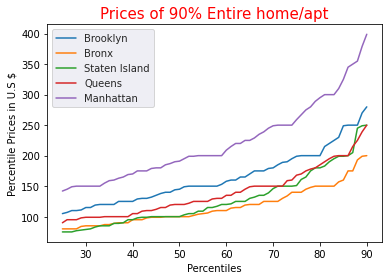

In [ ]:
plt.title('Prices of 90% Entire home/apt',fontsize=15,color='Red')
sns.set_style("darkgrid")

sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_brooklyn),label='Brooklyn')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Bronx),label='Bronx')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Staten_Island),label='Staten Island')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Queens),label='Queens')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Manhattan),label='Manhattan')

sd.set(xlabel='Percentiles', ylabel='Percentile Prices in U.S $')

##### 1. Why did you pick the specific chart?

1.We use line plot to display the frequency of data along a number line. It can be applied to data with a single given value.

2.It display  data in chronological order with continuous periodical representation.

3.Any changes in data can be seen at a glance.

4.Clearly shows the relationship between different data points.

##### 2. What is/are the insight(s) found from the chart?

From the Above code we are comparing the price comparison of Entire home/apt room type for each neighbourhood group . First we calculated the prices of each neighbourhood group for room type Entire/home apt and the prencentile of each private room type for Brooklyn,Bronx,Staten Island,Queens and Manhattan . After that we plot all these values in Line plot . Hence,From above data  we can clearly see that Manhattan is at the  top As followed by the Brooklyn ,Bronx,Staten Island and Queens.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights will help creating a positive business impact as the company has all the preferred data by the tourists and they can improve the business model for the growth of the company.



#### Chart - 14 - Correlation Heatmap

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'updated_price'],
      dtype='object')

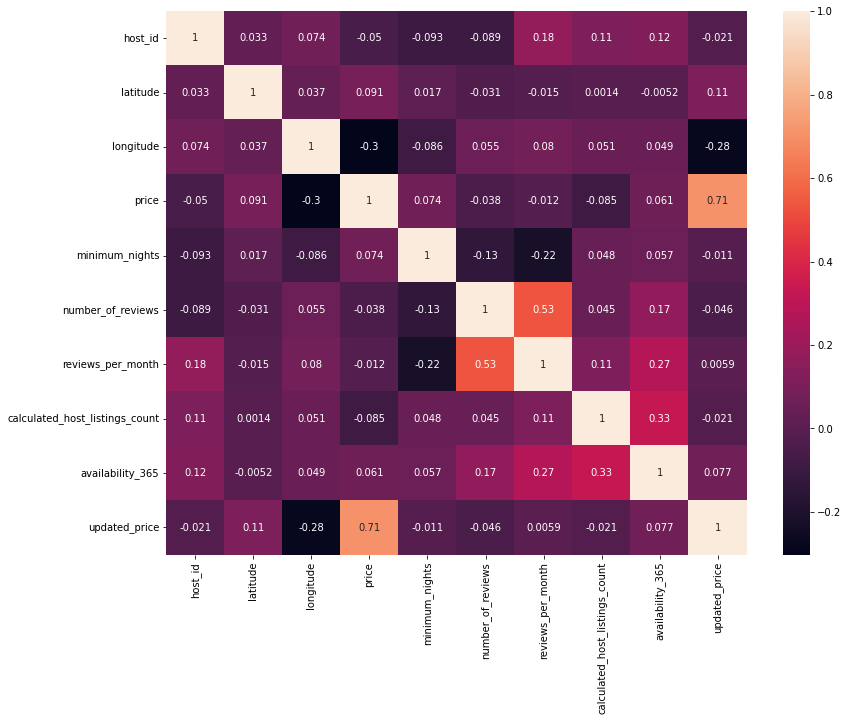

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
sns.heatmap(corr, annot=True)
df.columns

##### 1. Why did you pick the specific chart?

We use the heat maps  to visualize website user behavior. By looking at an aggregate of all user interactions on a web page, it becomes easier to spot issues and opportunities for improvement.

##### 2. What is/are the insight(s) found from the chart?

1.Each data value represents in a matrix and it has a special color. The color of the matrix is dependent on value. Normally, low-value show in low-intensity color and high-value show in hight-intensity color format.

2.Number of reviews and reviews per month have strong positive correlation and it is very obvious
Availability_365 and minimum nights have a small positive correlation(0.2) which shows that whenever the list was displayed people stayed there, which is also obvious.

3.Price and Calculated list hosting have a small positive correlation(0.2) which shows that price has been increased when more number of lists have been shown to the host


#### Chart - 15 - Pair Plot 

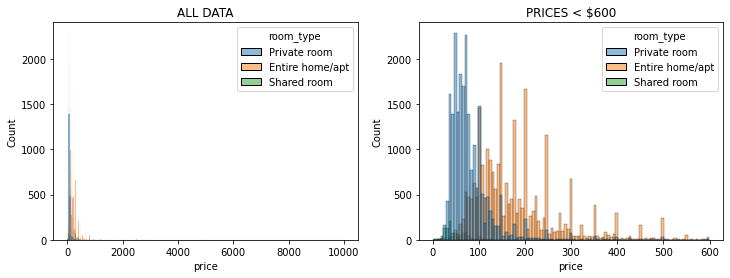

In [ ]:
# Pair Plot visualization code
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df, x='price', hue='room_type', ax=ax1).set_title('ALL DATA')
sns.histplot(df.loc[df['price'] < 600], x='price', hue='room_type', ax=ax2).set_title('PRICES < $600');

##### 1. Why did you pick the specific chart?

We use  histogram basically  to represent data provided in a form of some groups. It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the count  while Y-axis represents price . 

##### 2. What is/are the insight(s) found from the chart?

From the above histplot shows the relation between the  price of each room type thats is private room vs Entire room/apt vs shared room. From the first figure we are showing that Price less than 600 & From the 2nd data we are showing the prices of Private room,Entire room/apt and shared room less than $600.

We can observe the domination of Private room and Entire home/apt room type as compared to shared room type.

From this we can conclude that, Private room and Entire home/apt room type is preferred by the travellers as compared to shared room type. 

#### Chart - 16 - What type of room do people prefer in Neighourhood group?

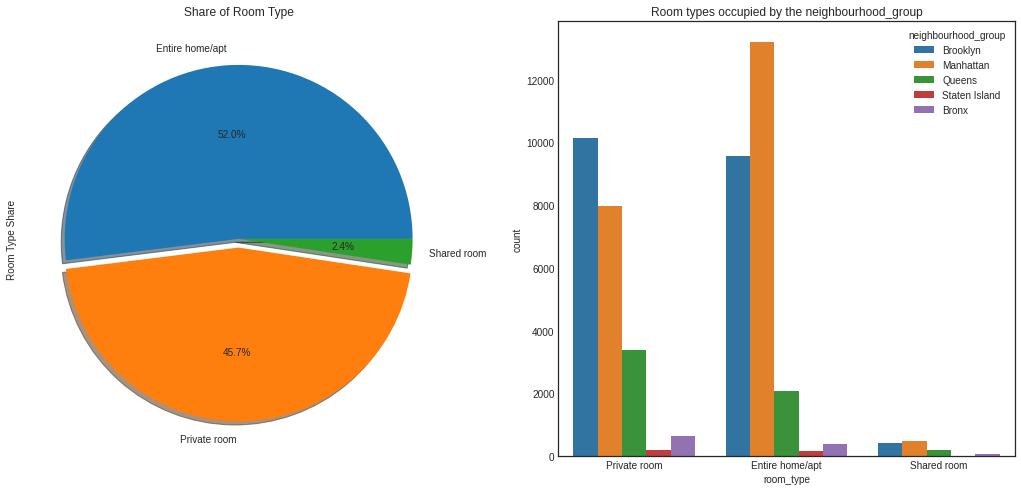

In [ ]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
ax[1].set_title('Room types occupied by the neighbourhood_group')
plt.show()

#### 1. Why do you the  specific chart ?

We use the Pie Charts to deal with  grouped data or data which is categorized & the Seaborn Countplot function creates bar charts of the number of observations per category. When we use sns.countplot, Seaborn literally counts the number of observations per category for a categorical variable.

#### 2. What is/are the insight(s) found from the chart?

From the above Diagram we observe some important information that is listed below:

1.Very less(2.7%) people prefer shared room, may be people are not comfortable to stay with strangers in NY.

2.More than 8000 people in Manhattan prefer Entire home/ apartment.

3.Nearly around 8000 people in Brooklyn prefer private room.

4.People in Staten island seldom book through airbnb.

## **5. Solution to Business Objective**

Some of the solutions to the Business Objective are -

1. Price which airbnb offers for the room should be lower than the average market hotel prices to make your place stand out. 

2. Entire home/apt and Private room types are preferred by the travellers, so company needs to focus on these room types, on their prices and hospitality.

3. Manhattan and Broklyn are the most preferred locations by the travellers so the company should work on these location's prices and hospitality. These locations are their hotspot for business so they should focus more there.

4. The hosts witch are less busy as compared to other hosts, these hosts should work on their hospitality in order for business expansion.

5. Try to make listings more available around the year for the growth of business. 

# **Conclusion**

This Airbnb dataset, appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. Through this exploratory data analysis and visualization project, we gained several interesting insights into the Airbnb rental market.  

First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded towards the  Pie Chart showing Neighbourhood Group Listings percentage in that we found that Manhattan with 44.3% has the highest number of listings followed by Brooklyn with 41.1% and followed by Queens with 11.6%. Further we observe that Staten Island(0.8%) has the least number of listings in the entire New York and Bronx(2.2%) has the second lowest listings count. Most preffered location for the tourist is Manhattan and Brooklyn.Next, we show the trend of 'room type' for different 'neighbourhood group with the help of count plot chart. 

In Brooklyn location, Private room type is preferred more as compared other room type,Manhattan location, Entire home/apt is preferred more as compared other room type.In Oueens location, Private room type is preferred more as compared other room type and in Staten Island location, private room and entire home/apt have same share of listings. In third Chart we have used Bar Plot and we found that Entire home/apt is the most preferred room type in the entire city as followed by Private room and shared room type.Further we analyzed that Dona was the most busiest host as followed by Jj,Maya,Carol and Danielle . After that  we used the Boxplot in that we analyzed that Staten Island has highest average airbnb availability whereas Manhattan and Brooklyn have fewer vacant days compared to the other boroughs.

Further we analyzed that Queens have maximum no of reviews so, it means that it have maximum number of tourists.Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as we analysed the relationship between price vs Number of reviews . we also found availability of around the year.Further we analysed that what type of room are more available and least available. Most Importantly we also found that which is the most expensive room .

For Further analysis we have Plotted neighbourhood group map with their respective coordinates. Next we have used Line Plot to Compare the price of Entire home/apt room type for each neighbourhood group. In that we have found that Entire room/apt was the most expensive. we also used Correlation Heatmap . We use the heat maps to visualize website user behaviour. By looking at an aggregate of all user interactions on a web page, it becomes easier to spot issues and opportunities for improvement. .In heat Map Each data value represents in a matrix and it has a special color. The color of the matrix is dependent on value. Normally, low-value show in low-intensity color and high-value show in hight-intensity color format.Next we used the Pair Plot to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the count while Y-axis represents price .  

Lastly, we found  What type of room do people prefer in Neighourhood group. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process.  Therefore, I hope this would help everyone!

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***